In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
controldf=pd.read_csv('control.csv',parse_dates=['Date'])
controldf=controldf.dropna()
experimentdf=pd.read_csv('experiment.csv',parse_dates=['Date'])
experimentdf=experimentdf.dropna()

In [15]:
controldf.head(1)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892


In [16]:
experimentdf.head(1)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion
0,"Sat, Oct 11",7716.0,686.0,105.0,34.0,0.153061,0.32381,0.049563


In [17]:
controldf['control']=1
controldf.head(2)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892,1
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,0.188703,0.476190,0.089859,1


In [18]:
experimentdf['control']=0
experimentdf.head()


,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7716.0,686.0,105.0,34.0,0.153061,0.323810,0.049563,0
1,"Sun, Oct 12",9288.0,785.0,116.0,91.0,0.147771,0.784483,0.115924,0
2,"Mon, Oct 13",10480.0,884.0,145.0,79.0,0.164027,0.544828,0.089367,0
3,"Tue, Oct 14",9867.0,827.0,138.0,92.0,0.166868,0.666667,0.111245,0
4,"Wed, Oct 15",9793.0,832.0,140.0,94.0,0.168269,0.671429,0.112981,0


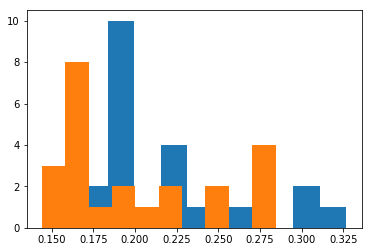

In [19]:
plt.hist(controldf['daily gross conversion'])
plt.hist(experimentdf['daily gross conversion'])
plt.show()

In [20]:
from scipy.stats import ttest_ind
test=['Pageviews', 'Clicks','Enrollments','Payments','daily gross conversion','daily retention','daily net conversion']
result=[];
for i in test:
    controltest = controldf[i]
    experimenttest = experimentdf[i]
    test = ttest_ind(controltest,experimenttest)
    print( i + '    Result  : ' + str(test))    

Pageviews    Result  : Ttest_indResult(statistic=0.14289030617246118, pvalue=0.88702917394098879)
Clicks    Result  : Ttest_indResult(statistic=0.065981539747908879, pvalue=0.94769141652048872)
Enrollments    Result  : Ttest_indResult(statistic=1.6865126742905381, pvalue=0.09877614030153456)
Payments    Result  : Ttest_indResult(statistic=0.59276581101776349, pvalue=0.55637238355471497)
daily gross conversion    Result  : Ttest_indResult(statistic=1.5396752583910756, pvalue=0.13080105377844889)
daily retention    Result  : Ttest_indResult(statistic=-1.0081408955019913, pvalue=0.31889896419918096)
daily net conversion    Result  : Ttest_indResult(statistic=0.53877774461341887, pvalue=0.59275587368847571)


In [26]:
webdf=pd.concat([controldf,experimentdf],ignore_index=True)
webdf.head(2)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892,1
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,0.188703,0.476190,0.089859,1


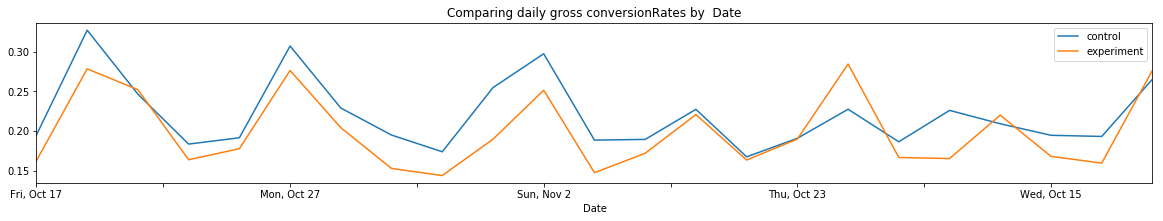

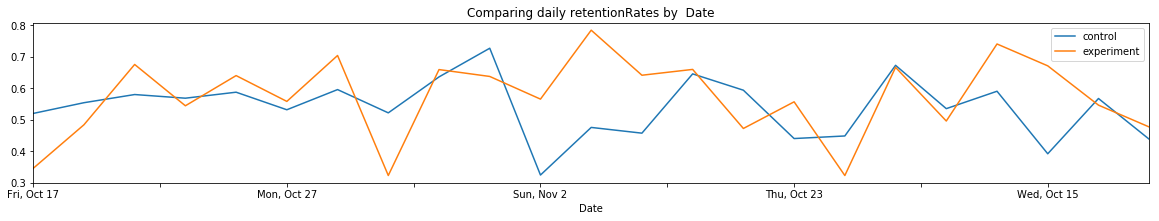

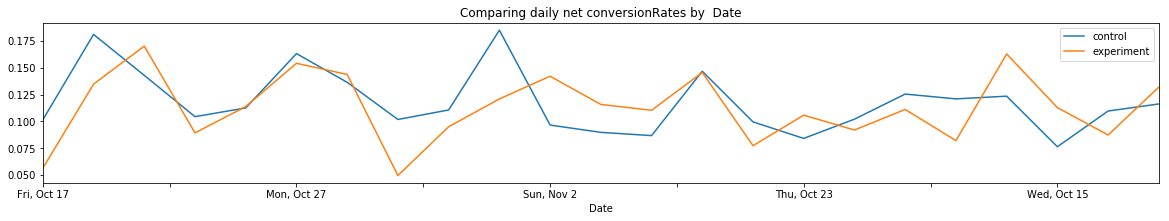

In [35]:

count=1
element = ['daily gross conversion', 'daily retention','daily net conversion'] 
for i in element:
    plt.figure(figsize=(20, 10))
    plt.subplot(3, 1, count)
    fig = webdf[webdf.control==1][i].groupby(webdf['Date']).mean().plot()
    webdf[webdf.control==0][i].groupby(webdf['Date']).mean().plot(ax=fig)
    plt.legend(['control','experiment'])
    plt.title('Comparing ' +str(i) + 'Rates by  Date')
    count+=1
    plt.show()
   

In [11]:
from scipy.stats import ttest_ind
controldgc=controldf['daily gross conversion']
experimentdgc=experimentdf['daily gross conversion']
ttest_ind(controldgc,experimentdgc)

Ttest_indResult(statistic=1.5396752583910756, pvalue=0.13080105377844889)

In [196]:
controldnc=controldf['daily net conversion']
experimentdnc=experimentdf['daily net conversion']
ttest_ind(controldr,experimentdr)

Ttest_indResult(statistic=-1.0081408955019913, pvalue=0.31889896419918096)

In [197]:
controldr=controldf['daily retention']
experimentdr=experimentdf['daily retention']
ttest_ind(controldr,experimentdr)

Ttest_indResult(statistic=-1.0081408955019913, pvalue=0.31889896419918096)

In [161]:
webdf=webdf.dropna()
webdf.head(2)

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892,1
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,0.188703,0.476190,0.089859,1


In [24]:
comparedf= webdf.groupby('Date').sum()
comparedf

,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control
Date,,,,,,,,
"Fri, Oct 17",18096.0,1528.0,273.0,120.0,0.358008,0.867005,0.158015,1
"Fri, Oct 24",18836.0,1370.0,414.0,216.0,0.605230,1.039082,0.316142,1
"Fri, Oct 31",17605.0,1428.0,356.0,224.0,0.498536,1.256284,0.313420,1
"Mon, Oct 13",20991.0,1793.0,312.0,174.0,0.347746,1.113690,0.193877,1
"Mon, Oct 20",21163.0,1721.0,318.0,195.0,0.369545,1.228402,0.226613,1
"Mon, Oct 27",19190.0,1530.0,446.0,243.0,0.583247,1.090874,0.317718,1
"Sat, Nov 1",16908.0,1376.0,298.0,193.0,0.433391,1.300379,0.280449,1
"Sat, Oct 11",15439.0,1373.0,239.0,104.0,0.348112,0.846198,0.151455,1
"Sat, Oct 18",15098.0,1284.0,204.0,132.0,0.318222,1.295938,0.205852,1


In [163]:
webdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 9 columns):
Date                      46 non-null object
Pageviews                 46 non-null float64
Clicks                    46 non-null float64
Enrollments               46 non-null float64
Payments                  46 non-null float64
daily gross conversion    46 non-null float64
daily retention           46 non-null float64
daily net conversion      46 non-null float64
control                   46 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.6+ KB


In [179]:
wewebdf['control'].unique()

NameError: name 'wewebdf' is not defined

In [178]:
controldf['Inc daily gross conversion']= experimentdf.iloc[:,5]- controldf.iloc[:,5]>0
controldf['Inc daily retention']= experimentdf.iloc[:,6]- controldf.iloc[:,6]>0
controldf['Inc daily net conversion']= experimentdf.iloc[:,7]- controldf.iloc[:,7]>0

,Date,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention,daily net conversion,control,T
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,0.195051,0.522388,0.101892,1,False
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,0.188703,0.476190,0.089859,1,False
2,"Mon, Oct 13",10511.0,909.0,167.0,95.0,0.183718,0.568862,0.104510,1,False
3,"Tue, Oct 14",9871.0,836.0,156.0,105.0,0.186603,0.673077,0.125598,1,False
4,"Wed, Oct 15",10014.0,837.0,163.0,64.0,0.194743,0.392638,0.076464,1,False
5,"Thu, Oct 16",9670.0,823.0,138.0,82.0,0.167679,0.594203,0.099635,1,False
6,"Fri, Oct 17",9008.0,748.0,146.0,76.0,0.195187,0.520548,0.101604,1,False
7,"Sat, Oct 18",7434.0,632.0,110.0,70.0,0.174051,0.636364,0.110759,1,False
8,"Sun, Oct 19",8459.0,691.0,131.0,60.0,0.189580,0.458015,0.086831,1,False
9,"Mon, Oct 20",10667.0,861.0,165.0,97.0,0.191638,0.587879,0.112660,1,False


In [165]:
diffdf = experimentdf.iloc[:,1:7]- controldf.iloc[:,1:7]

a=diffdf.loc[(diffdf['daily gross conversion'] >0)]
a

,Pageviews,Clicks,Enrollments,Payments,daily gross conversion,daily retention
17,33.0,0.0,8.0,29.0,0.010870,0.149832
18,-65.0,-12.0,5.0,10.0,0.011255,0.038836
19,-37.0,-6.0,40.0,-8.0,0.056820,-0.125430
20,-175.0,16.0,8.0,22.0,0.005619,0.095364


In [172]:
#controldf['increase_dgc'] = 1 if all(experimentdf[:,5] > controldf[:,5])
#controldf['increase_dgc'] = lambda x:1 if experimentdf[:,5]>controldf[:,5] else 0  
#controldf['increase_dgc'] = 1 if experimentdf['daily gross conversion'] > controldf['daily gross conversion'] else 0
y='daily gross conversion'
#controldf['increase_dgc']= experimentdf.apply(
#    lambda x: 1 if experimentdf['daily gross conversion'] > controldf['daily gross conversion'] else 0,axis=1)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index 0')

In [120]:
controldf['increase_dgc']

TypeError: 'Series' object is not callable

In [152]:
#ttest_ind(df[df.Sms_Reminder == 0].Status, df[df.Sms_Reminder == 1].Status))
experimentdf['daily gross conversion'].values

array([ 0.15306122,  0.1477707 ,  0.16402715,  0.1668682 ,  0.16826923,
        0.16370558,  0.16282051,  0.14417178,  0.17216643,  0.17790698,
        0.16550926,  0.15980025,  0.19003115,  0.27833572,  0.18983558,
        0.22077922,  0.27626459,  0.2201087 ,  0.27647868,  0.28434066,
        0.25207756,  0.20431655,  0.25138122])

In [153]:
if experimentdf['daily gross conversion'].values > controldf['daily gross conversion'].values:
    controldf['increase_dgc'] =1
else:
    controldf['increase_dgc'] =0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [146]:
controldf['increase_dgc'].unique()

array([1], dtype=int64)